In [ ]:
# Install Libraries
#!pip install textblob
#!pip install tweepy

In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

#import pycountry
import re
import string
import logging
import time

In [2]:
# Authentication
consumerKey = 'nr4PBoGQVxtX65NzLQ2Asi1Kd'
consumerSecret = 'ikMMfoKbgPo77P1ipe8ckXOUBGWCxFWjzLXzZZIR5DlhJEbZ99'
accessToken = '420502968-VDiQXUKXksRWx1zLVvynihkWSD6fGu0KDaosnAUl'
accessTokenSecret = 'vNAGrmxDcuYbQUFEADD59Zdx6d0ixHQEK9bl6XQgqYKxz'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
df_twitter=pd.read_csv('twitter_deputies.csv')
df_twitter.twitter=df_twitter.twitter.astype('str')
df_twitter.head(3)

,Unnamed: 0,speaker,term_ini,year_ini,party,term_max,year_max,twitter
0,0,abelbaptista,13,2015,CDS-PP,13,2016,nan
1,1,adaosilva,13,2015,PSD,14,2021,nan
2,2,afonsooliveira,14,2019,PSD,14,2021,nan


In [6]:
df_twitter.twitter.unique()


array(['nan', 'alberto_machado', 'alexandre_poco', 'almabcrivera',
       'alvalmeida', 'acmendes73', 'anapassosfaro', 'coelho_lima1',
       'andrecventura', 'guerra_aguerra', 'antoniocostaps',
       'AntonioFilipe', 'leitao_amaro', 'limacosta', 'cristasassuncao',
       'bgomesdias', 'bebianacunha', 'bertacabral', 'bjvitorino',
       'cabreuamorim', 'carlitosbras', 'carlosvalecesar', 'CEReis5',
       'carlosp02740287', 'catarina_mart', 'catarinarf', '_ClaudiaAndre',
       'claucruzsantos', 'CristinaRodS', 'cristovaonorte',
       'dianajmferreira', 'Diogo_Leao', 'duartealves_', 'editeestrela',
       'emiliacerquei10', 'ffigueiredo14', 'fernandoanasta8',
       'fernandonegra0', 'fernandopf2021', 'fernandoruaspe',
       'filiparoseta', 'anacoretafilipe', 'filipenb', 'heloisapolonia',
       'hmscarneiro', 'hdamcarvalho', 'h_oliveira', 'hugopolidopires',
       'IsabelLMMoreira', 'isabelruapires', 'isabel_mep', 'isauramorais5',
       'ivancgoncalves', 'joacinekatar', 'JoanaMorta

In [68]:
['alberto_machado','alexandre_poco','almabcrivera',
'alvalmeida',
'acmendes73',
'anapassosfaro',
'coelho_lima1',
'andrecventura',
'guerra_aguerra',
'antoniocostaps',
'AntonioFilipe',
'leitao_amaro']

73

In [10]:

tweetsC=[]
for us in df_twitter.twitter:
    if  us!='nan':
        print(us)
        ini_date=str(df_twitter[df_twitter.twitter==us].year_ini.values[0])+'01010000'
        end_date=str(df_twitter[df_twitter.twitter==us].year_max.values[0])+'12300000'
        tweets=tweepy.Cursor(api.search_full_archive,label='opendatapt', query='from:'+us+' -is:reply -is:retweet', fromDate=ini_date, toDate=end_date).items(3000)
        #tweetsC.append([tweets.user.screen_name,tweets.text, tweets.created_at.year, tweets.id,"https://twitter.com/" + str(tweets.user.screen_name) + "/status/" + str(tweets.id)])
                                    
        while True:
            try:
                tweet = tweets.next()
                tweetsC.append([tweet.user.screen_name,tweet.text, tweet.created_at.year, tweet.id,"https://twitter.com/" + str(tweet.user.screen_name) + "/status/" + str(tweet.id)])
            except StopIteration:
                print(len(tweetsC))
                break #return
            except tweepy.errors.TweepyException as e:
                #if 'Failed to send request:' in e.reason:
                print ("Time out error caught.", e)
                time.sleep(180)
                continue

df=pd.DataFrame(tweetsC)
df.columns=['user_name', 'text', 'year', 'tweet_id', 'url']
df.to_pickle('raw_tweets.pkl')

filipenb
Time out error caught. 429 Too Many Requests
Request exceeds account’s current package request limits. Please upgrade your package and retry or contact Twitter about enterprise access.


In [5]:
len(tweetsC)
#drop duplicates id
#clean text

18752

In [53]:
repliesC=[]
for us in df_twitter.twitter:
    if  us!='nan':
        print(us)
        
        ini_date=str(df_twitter[df_twitter.twitter==us].year_ini.values[0])+'01010000'
        end_date=str(df_twitter[df_twitter.twitter==us].year_max.values[0])+'12300000'
        replies=tweepy.Cursor(api.search_full_archive,label='opendatapt', query='to:'+us+' is:reply -is:retweet', fromDate=ini_date, toDate=end_date).items(3000)
        while True:
                    try:
                        reply = replies.next()
                        repliesC.append([us,reply.text, reply.created_at.year, reply.id,"https://twitter.com/" + str(reply.user.screen_name) + "/status/" + str(reply.id)])
                    except StopIteration:
                        print(len(repliesC))
                        break #return
        
dfR=pd.DataFrame(repliesC)
dfR.columns=['user_name', 'text', 'year', 'tweet_id', 'url']
dfR.to_pickle('raw_replies.pkl')

3000


In [287]:
parse_list=['antoniocostapm','josesoeiroporto','RuiRioPSD','jcf_liberal','AndreCVentura','catarina_mart','joao_ferreira33', 'ruitavares', 'lnes_Sousa_Real']
mega_tweet_list=[]
for sname in parse_list:
    try:
        #user_tweets = api.user_timeline(screen_name = sname, tweet_mode = 'extended', lang='pt', count=200, include_rts=True).items(3200)
        user_tweets = tweepy.Cursor(api.user_timeline, screen_name=sname, tweet_mode = 'extended').items(5000)
    except :
        print("Failed to run the command on that user, Skipping...")
        continue
#   user_tweets = tweepy.Cursor(api.user_timeline, screen_name=sname, tweet_mode = 'extended', lang='en').items(20)
    print(sname)
    for t in user_tweets:
        if hasattr(t, 'retweeted_status'):
            author = t.retweeted_status.user.screen_name
        else: author = t.user.screen_name
        user_id = t.user.id
        user_name = t.user.name
        user_screenName = t.user.screen_name
        user_text = t.full_text
        #user_text = re.sub(r"http\S+", "", user_text)
        user_text = re.sub(r'https?:\/\/.*[\r\n]*', '', user_text, flags=re.MULTILINE) 
        remove_rt = lambda x: re.sub('RT @\w+: ','  ',x)
        user_text.replace("\n"," ").replace("\r"," ").replace("|"," ").replace(" | "," ").replace("?"," ")
        user_text = ' '.join(user_text.split())
        user_timestamp = t.created_at
        user_retweet = t.retweet_count
        user_favorite = t.favorite_count
        user_followers = t.user.followers_count
        user_link='https://twitter.com/twitter/statuses/'+str(t.id)
        userframe = [user_id,user_link,user_name,user_screenName, author,user_text,user_timestamp,user_retweet,user_favorite,user_followers,user_following]
        mega_tweet_list.append(userframe)

antoniocostapm
josesoeiroporto
RuiRioPSD
jcf_liberal
AndreCVentura
catarina_mart
joao_ferreira33
ruitavares
lnes_Sousa_Real


In [290]:
headers=['user_id','user_link', 'user_name','user_screenName', 'author','user_text','user_timestamp','user_retweet','user_favorite','user_followers','user_following']
df = pd.DataFrame(mega_tweet_list, columns=headers)


In [291]:
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ','  ',x)
rt = lambda x: re.sub('[^A-Za-z0-9]+',' ',x)
df['user_text'] = df['user_text'].map(remove_rt).map(rt)
df['user_text'] = df['user_text'].str.lower()
df.sort_values('user_timestamp')[0:10]

,user_id,user_link,user_name,user_screenName,author,user_text,user_timestamp,user_retweet,user_favorite,user_followers,user_following
16325,616440530,https://twitter.com/twitter/statuses/269169078...,Inês de Sousa Real,lnes_Sousa_Real,lnes_Sousa_Real,luispalves n o mais dinheiro para touradas,2012-11-15 20:04:43+00:00,0,0,5718,1242
16324,616440530,https://twitter.com/twitter/statuses/269169231...,Inês de Sousa Real,lnes_Sousa_Real,lnes_Sousa_Real,carloscoelhope n o mais dinheiro para touradas,2012-11-15 20:05:20+00:00,0,0,5718,1242
16323,616440530,https://twitter.com/twitter/statuses/269169340...,Inês de Sousa Real,lnes_Sousa_Real,lnes_Sousa_Real,editeestrela n o mais dinheiro para touradas,2012-11-15 20:05:46+00:00,0,0,5718,1242
16322,616440530,https://twitter.com/twitter/statuses/269169380...,Inês de Sousa Real,lnes_Sousa_Real,lnes_Sousa_Real,diogo feio n o mais dinheiro para touradas,2012-11-15 20:05:55+00:00,0,0,5718,1242
16321,616440530,https://twitter.com/twitter/statuses/269169675...,Inês de Sousa Real,lnes_Sousa_Real,lnes_Sousa_Real,elisaferreira n o mais dinheiro para touradas,2012-11-15 20:07:06+00:00,0,0,5718,1242
16320,616440530,https://twitter.com/twitter/statuses/269169710...,Inês de Sousa Real,lnes_Sousa_Real,lnes_Sousa_Real,anargomes n o mais dinheiro para touradas,2012-11-15 20:07:14+00:00,0,0,5718,1242
16319,616440530,https://twitter.com/twitter/statuses/269169744...,Inês de Sousa Real,lnes_Sousa_Real,lnes_Sousa_Real,vitalmoreira09 n o mais dinheiro para touradas,2012-11-15 20:07:22+00:00,0,0,5718,1242
16318,616440530,https://twitter.com/twitter/statuses/269169777...,Inês de Sousa Real,lnes_Sousa_Real,lnes_Sousa_Real,libertarofuturo n o mais dinheiro para touradas,2012-11-15 20:07:30+00:00,0,0,5718,1242
16317,616440530,https://twitter.com/twitter/statuses/269169818...,Inês de Sousa Real,lnes_Sousa_Real,lnes_Sousa_Real,ruitavares n o mais dinheiro para touradas,2012-11-15 20:07:40+00:00,0,0,5718,1242
16316,616440530,https://twitter.com/twitter/statuses/646312588...,Inês de Sousa Real,lnes_Sousa_Real,lnes_Sousa_Real,eupetwelfare adr provedoranimaislisboa,2015-09-22 13:18:23+00:00,0,1,5718,1242


In [292]:
df['year']=df.user_timestamp.dt.year
df['month']=df.user_timestamp.dt.month
df['day']=df.user_timestamp.dt.day
df['date']=df.user_timestamp.dt.date

In [293]:
df_elit=df.groupby('date').agg({'user_id':'first','user_link':'first','user_name':'first','user_screenName':'first', 'author':'first','user_text':'first','user_timestamp':'first','user_retweet':'first','user_favorite':'max','user_followers':'first','user_following':'first'})


In [294]:
df_elit.user_name.unique()

array(['Inês de Sousa Real', 'João Ferreira', 'António Costa', 'Rui Rio',
       'André Ventura', 'Catarina Martins', 'João Cotrim Figueiredo',
       'José Soeiro', 'rui tavares'], dtype=object)

In [296]:
df_elit.to_csv('elite_polarization_twitter.csv')

In [274]:
import time

ids = []
for politician in df.user_name.unique():
    for page in tweepy.Cursor(api.get_follower_ids, screen_name=politician).pages():
        ids.extend(page)
        #time.sleep(60)



In [275]:
screen_names = [user.screen_name for user in api.lookup_users(user_id=ids) if (user.followers_count<5000) & (user.followers_count>300)  ]

In [233]:
len(screen_names)


15

In [276]:
#parse_list=['antoniocostapm','josesoeiroporto']
mass_tweet_list=[]
for sname in screen_names:
    try:
        #user_tweets = api.user_timeline(screen_name = sname, tweet_mode = 'extended', lang='pt', count=200, include_rts=True).items(3200)
        user_tweets = tweepy.Cursor(api.user_timeline, screen_name=sname, tweet_mode = 'extended').items(5000)
    except :
        print("Failed to run the command on that user, Skipping...")
        continue
#   user_tweets = tweepy.Cursor(api.user_timeline, screen_name=sname, tweet_mode = 'extended', lang='en').items(20)
    print(sname)
    for t in user_tweets:
        if hasattr(t, 'retweeted_status'):
            author = t.retweeted_status.user.screen_name
        else: author = t.user.screen_name
        user_id = t.user.id
        user_name = t.user.name
        user_screenName = t.user.screen_name
        user_text = t.full_text
        #user_text = re.sub(r"http\S+", "", user_text)
        user_text = re.sub(r'https?:\/\/.*[\r\n]*', '', user_text, flags=re.MULTILINE) 
        remove_rt = lambda x: re.sub('RT @\w+: ','  ',x)
        user_text.replace("\n"," ").replace("\r"," ").replace("|"," ").replace(" | "," ").replace("?"," ")
        user_text = ' '.join(user_text.split())
        user_timestamp = t.created_at
        user_retweet = t.retweet_count
        user_favorite = t.favorite_count
        user_followers = t.user.followers_count
        user_following=t.user.friends_count
        user_t_link=t.
        userframe = [user_id,user_name,user_screenName, author,user_text,user_timestamp,user_retweet,user_favorite,user_followers,user_following]
        mass_tweet_list.append(userframe)

Free_Webinars
LindaFarrelly4
ThinkAtlantic
F_Cafiero
RaquelBPSilva


KeyboardInterrupt: 

In [ ]:
headers=['user_id','user_name','user_screenName', 'author','user_text','user_timestamp','user_retweet','user_favorite','user_followers','user_following']
df_mass = pd.DataFrame(mass_tweet_list, columns=headers)


In [ ]:
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ','  ',x)
rt = lambda x: re.sub('[^A-Za-z0-9]+',' ',x)
df_mass['user_text'] = df_mass['user_text'].map(remove_rt).map(rt)
df_mass['user_text'] = df_mass['user_text'].str.lower()
#df_mass.sort_values('user_timestamp')[0:10]

In [ ]:
from langdetect import detect
def detect_lang(x):
    try:
        return detect(x)
    except:
        return 'no_feat'

df_mass['lang']=df_mass['user_text'].map(detect_lang)


In [168]:

    
tweets = api.user_timeline(user_id='808051518242979841', 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )

In [169]:
len(tweets)

191

In [170]:
for info in tweets[0:3]:
     print("ID: {}".format(info.id))
     print(info.created_at)
     print(info.full_text)
     print(info.favorite_count)
     print("\n")

ID: 1493280154923249668
2022-02-14 17:45:07+00:00
A new level of costumer service🤓🛍️

Meet Dal-e the super-cute #robot assistant of @Hyundai 🚗🤖

ty @CurieuxExplorer via  @DigitalTrends cc @WhiteheartVic @MasterofIoT @CERN @vinod1975 @KaiGrunwitz @nathanbenaich @svenphilipsen #AI #Robotic #Future #DigitalTransformation #AINews https://t.co/TtVB5FVaht
12


ID: 1493252454288400391
2022-02-14 15:55:03+00:00
Distributed #ArtificialIntelligence to help make sense of #BigData 🦾 by @ingliguori

cc @HeinzVHoenen @ylecun @lawrennd @dennybritz @demishassabis #AI #Analytics #AINews #DataScience #Python #CloudComputing #DevCommunity #DataScience #DigitalTransformation #MachineLearning https://t.co/lM6kakPb70
16


ID: 1493226013240836098
2022-02-14 14:09:59+00:00
@ohhhmindy @TechInsider @glennAI @ham_gretsky @inma_martinez @cybercodetwins @enricomolinari @MasterofIoT @GoogleAI @PartnershipAI @ceobillionaire 😄😄
2




In [167]:
ids

[183063669,
 808051518242979841,
 386538440,
 1426526556134928405,
 1362063816238989313,
 796706034144411648,
 715825348684988416,
 2336551806,
 1426528724158136323,
 826109223239032832,
 3301428441,
 1169047208,
 1880109673,
 313283791,
 55362811,
 1196558746878693380,
 1704032226,
 2572941023,
 426229796,
 1161090442248613888,
 1057613509024997380,
 1007622842366611456,
 2817073844,
 933337770281578496,
 420303744,
 33277490,
 747076049565999104,
 2923874710,
 2457132342,
 3252829864,
 4900040883,
 2767606841,
 2188960103,
 1337937090,
 325564624,
 23263743,
 315492637,
 54078222]

In [50]:
tweets = api.user_timeline(screen_name='DYNAMICS_PhD', 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )

In [52]:
created_at
id
id_str
full_text
followers_count

99

In [285]:
tweets[0]._json.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

In [286]:
tweets[0]._json

{'created_at': 'Mon Feb 14 17:45:07 +0000 2022',
 'id': 1493280154923249668,
 'id_str': '1493280154923249668',
 'full_text': 'A new level of costumer service🤓🛍️\n\nMeet Dal-e the super-cute #robot assistant of @Hyundai 🚗🤖\n\nty @CurieuxExplorer via  @DigitalTrends cc @WhiteheartVic @MasterofIoT @CERN @vinod1975 @KaiGrunwitz @nathanbenaich @svenphilipsen #AI #Robotic #Future #DigitalTransformation #AINews https://t.co/TtVB5FVaht',
 'truncated': False,
 'display_text_range': [0, 277],
 'entities': {'hashtags': [{'text': 'robot', 'indices': [62, 68]},
   {'text': 'AI', 'indices': [226, 229]},
   {'text': 'Robotic', 'indices': [230, 238]},
   {'text': 'Future', 'indices': [239, 246]},
   {'text': 'DigitalTransformation', 'indices': [247, 269]},
   {'text': 'AINews', 'indices': [270, 277]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'Hyundai',
    'name': 'Hyundai USA',
    'id': 26007726,
    'id_str': '26007726',
    'indices': [82, 90]},
   {'screen_name': 'CurieuxExplorer',
 

In [73]:
tweets[0].screen_name

AttributeError: 'Status' object has no attribute 'screen_name'

In [96]:
for info in tweets[0:3]:
     print("ID: {}".format(info.id))
     print(info.created_at)
     print(info.full_text)
     print(info.favorite_count)
     print("\n")

ID: 1487412351980736517
2022-01-29 13:08:34+00:00
Congrats and well done @anthea_jeanne 👏🏻🥳 We are very proud that another doctoral students @DYNAMICS_PhD is #PhDone https://t.co/VZXCWv9waQ
20


ID: 1483066607601688577
2022-01-17 13:20:07+00:00
@LWestheuser @HumboldtUni @MauSteffen @thomasluxberlin Welcome!
2


ID: 1481975701192560641
2022-01-14 13:05:15+00:00
@jschultecloos @GSI_Muenchen @ECPR Congrats 🥳
1




In [29]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('“negative number: “', len(negative_list))
print('“neutral number: “',len(neutral_list))

total number:  10
positive number:  2
“negative number: “ 2
“neutral number: “ 6


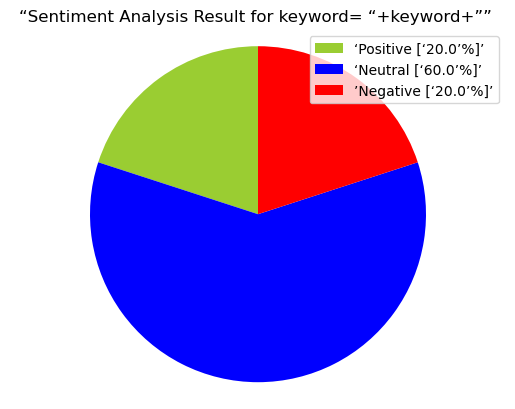

In [34]:
#Creating PieCart
labels = ['‘Positive [‘'+str(positive)+'’%]’' , '‘Neutral [‘'+str(neutral)+'’%]’','’Negative [‘'+str(negative)+'’%]’']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('“Sentiment Analysis Result for keyword= “+keyword+”” ')
plt.axis('equal')
plt.show()

In [35]:
tweet_list

,0
0,"RT @Guarromantico_: Algún día bb, algún día… h..."
1,Ay kusura bakmayın da iğrenç bi gündü. Analiz ...
2,@bb__2_ 막 넣어 막 먹어 냠냠냠
3,"@AdrianaBotta3 Terrible enfermedad, yo cuido a..."
4,RT @Marian01643245: sana baktığımda ruhum seni...
5,RT @FormiganaPaz: FINAL DE SEMANA E TUDO NA FO...
6,"@agustinabelenb Lo amo, gracias por retratar a..."
7,@nY0nGt0ry_BB いぎだぃぃぃぃぃ
8,"RT @TejuKaDevar: Post BB Records.\n\n""CELEBRAT..."
9,RT @ohmybeautybank: [bb] Thanks in advance ❤ h...


In [36]:
tweet_list.drop_duplicates(inplace = True)

In [46]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ','  ',x)
rt = lambda x: re.sub('[^A-Za-z0-9]+',' ',x)
tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,"RT @Guarromantico_: Algún día bb, algún día… h...",alg n d a bb alg n d a https t co nchca1phot
1,Ay kusura bakmayın da iğrenç bi gündü. Analiz ...,ay kusura bakmay n da i ren bi g nd analiz yap...
2,@bb__2_ 막 넣어 막 먹어 냠냠냠,bb 2
3,"@AdrianaBotta3 Terrible enfermedad, yo cuido a...",adrianabotta3 terrible enfermedad yo cuido a ...
4,RT @Marian01643245: sana baktığımda ruhum seni...,sana bakt mda ruhum senin i in titriyor sensi...
5,RT @FormiganaPaz: FINAL DE SEMANA E TUDO NA FO...,final de semana e tudo na formiga sabado tem ...
6,"@agustinabelenb Lo amo, gracias por retratar a...",agustinabelenb lo amo gracias por retratar a ...
7,@nY0nGt0ry_BB いぎだぃぃぃぃぃ,ny0ngt0ry bb
8,"RT @TejuKaDevar: Post BB Records.\n\n""CELEBRAT...",post bb records celebrate love with tejran
9,RT @ohmybeautybank: [bb] Thanks in advance ❤ h...,bb thanks in advance https t co pzqjnluzup


In [49]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = 'positive'
    else:
        tw_list.loc[index, 'sentiment'] = 'neutral'
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"RT @Guarromantico_: Algún día bb, algún día… h...",alg n d a bb alg n d a https t co nchca1phot,0.0,0.0,neutral,0.0,1.0,0.0,0.0
1,Ay kusura bakmayın da iğrenç bi gündü. Analiz ...,ay kusura bakmay n da i ren bi g nd analiz yap...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,@bb__2_ 막 넣어 막 먹어 냠냠냠,bb 2,0.0,0.0,neutral,0.0,1.0,0.0,0.0
3,"@AdrianaBotta3 Terrible enfermedad, yo cuido a...",adrianabotta3 terrible enfermedad yo cuido a ...,-1.0,1.0,negative,NaN,NaN,NaN,NaN
4,RT @Marian01643245: sana baktığımda ruhum seni...,sana bakt mda ruhum senin i in titriyor sensi...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
5,RT @FormiganaPaz: FINAL DE SEMANA E TUDO NA FO...,final de semana e tudo na formiga sabado tem ...,0.0,1.0,negative,NaN,NaN,NaN,NaN
6,"@agustinabelenb Lo amo, gracias por retratar a...",agustinabelenb lo amo gracias por retratar a ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
7,@nY0nGt0ry_BB いぎだぃぃぃぃぃ,ny0ngt0ry bb,0.0,0.0,neutral,0.0,1.0,0.0,0.0
8,"RT @TejuKaDevar: Post BB Records.\n\n""CELEBRAT...",post bb records celebrate love with tejran,0.5,0.6,positive,NaN,NaN,NaN,NaN
9,RT @ohmybeautybank: [bb] Thanks in advance ❤ h...,bb thanks in advance https t co pzqjnluzup,0.2,0.2,positive,NaN,NaN,NaN,NaN
